# Machine learning; NTX
Identifying handdrawn numbers from 0 to 9. So models can identify correct digits, they need to be trained with relative data. That is done by using data from the MNIST-dataset. 

To put this in a programmers perspective, this would be considered the "Hello World" of machine learning.

There are three main sections that cover the code and explanations. There is also one additional section that covers a html-code for a local website, where the models can but up for the test of identifying a handdrawn phone number.



## Julia and some brief code explanations
### Packages

The script mainly relies on two packages: Flux and MLDatasets.

Flux:

MLDatasets:


#### How to use NN.jl

#### How to use models.jl

#### How to use home.jl


## Models
### 3LS
The main neural network model used for this project is called 3LS, wich stands for 3-layers and the use of the sigmoid activation function. The julia code to create the model is:
```
function model_3LS()
    """
    A 3-layer model using 60 nodes in the inner layers.
    Using the sigmoid activation function.
    """

    m_3LS = Chain(
        Dense(28*28, 60, sigmoid), # Input Layer -> Hidden Layer 1
        Dense(60, 60, sigmoid),     # Hidden Layer 1 -> Hidden Layer 2
        Dense(60, 10, sigmoid)      # Hidden Layer 2 -> Output Layer
    )
    return m_3LS
end
```

To descibe the model better

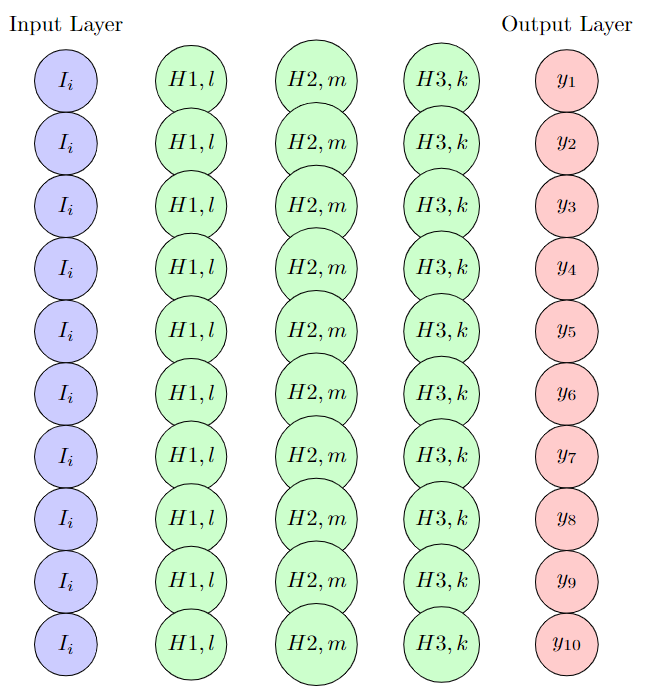

### Loss functions
When it comes to the loss function there are many options such as MSE, Binary Cross-Entropy Loss and Huber loss.
#### MSE
When it comes to choosing which loss function works the best, it depends on the model. The go to loss function when working with simple models is MSE, that is Mean Squared Error. It is defined with the following formula:
$$ MSE = \frac{1}{N}\sum^n_{i=1}(y_i^2-\hat{y}_i^2) $$

### Activation functions
#### Sigmoid

#### Relu

The Rectified Linear Unit activation function, abbreviated as ReLU, is a piecewise linear function. It will output the input directly as it is if input is positive.
$$ ReLU(a) = max\{0,a\} $$

#### Softmax

The softmax function converts a vector of N real values into another vector of N real values, ensuring that the resulting values sum to 1. Regardless of the input values the softmax function transforms them into a range between 0 and 1.

$$ softmax(z_i) = \frac{e^{z_i}}{\sum^N_{j=1}e^{z_j}}$$

### Techiques
#### BatchNorm
Batch normalization (BatchNorm) is a technique commonly used in neural networks to improve training stability and speed. It normalizes the input of each layer in a mini-batch by adjusting and scaling it, which helps in reducing internal covariate shift. Internal covariate shift occurs when the distribution of the inputs to a neural network's layer changes during training, making it difficult for the network to learn effectively. 



Here is some `inline code`.

Here are some ```inline codes```

In [6]:


using ForwardDiff

gradient_params = ForwardDiff.gradient(params -> model_loss(params, x_data, y_data), initial_params)



plot! (generic function with 4 methods)

In [ ]:
# Training loop
for epoch in 1:1000
    Flux.train!(loss, dataset, opt)
    
    # Calculate training and validation loss at the end of each epoch
    push!(train_losses, Flux.Losses.crossentropy(model(X_train), y_train))
    push!(test_losses, Flux.Losses.crossentropy(model(X_test), y_test))
    
    if epoch % 10 == 0
        @show("Epoch: $epoch")
        evalcb()
    end
end

# Plot the training and validation loss curves
plot(1:1000, train_losses, label="Training Loss", xlabel="Epochs", ylabel="Loss", linewidth=2)
plot!(1:1000, test_losses, label="Validation Loss", linewidth=2)


# ath hugmynd af því hvernig sé hægt að plotta loss...

In [ ]:
Author: Axel Bjarkar Sigurjónsson

It interacts with models.jl to access various neural network architectures and utilizes 
the structure defined in NN.jl.
"""

include("NN.jl")
include("models.jl")

# ---------- CONSTANTS ---------- #
MODEL  = model_3LS()
OPT    = "ADAM"        # OPT can be "GD" or "ADAM"... for now ;)
LR     = 0.01
EPOCHS = 20

# ----------  ---------- #
elapsed_time = @elapsed begin

    myNN = NN(MODEL,OPT,LR)
    train(myNN,EPOCHS)

end # stopwatch stops
println("Elapsed time: $elapsed_time seconds")
println("Loss: ",get_loss(myNN))
println("Accuracy: ",accuracy(myNN))

# to save model as bson file:
# @save "digits2.bson" myNN

In [1]:
# home.jl
include("NN.jl")
include("models.jl")

using Plots
using Images
using MLDatasets
using BSON
using FileIO
using Flux
using ImageShow
using ImageInTerminal
using ImageIO
using ImageMagick
using LinearAlgebra
using JLD2

# ---------- CONSTANTS ---------- #
MODEL  = model_3LS()
OPT    = "A"        # OPT can be "GD" or "ADAM"... for now ;)
LR     = 0.01
EPOCHS = 1

# ----------  ---------- #
elapsed_time = @elapsed begin
    myNN = NN(MODEL, OPT, LR)
    loss_history = train(myNN, EPOCHS)
end

# Plot the loss over time
plot(1:EPOCHS, loss_history, xlabel="Epochs", ylabel="Loss", label="Training Loss", legend=:topleft)
title!("Loss over epoch, [New model]")
savefig("loss_new_model.png")

# # Print results
println("Elapsed time: $elapsed_time seconds")
println("Final Loss: ", loss_history[end])
println("Accuracy: ", accuracy(myNN))


# @save "digits_new.bson" myNN

Training completed


Elapsed time: 36.4989166 seconds


Final Loss: 0.090371616


Accuracy: 0.0958


In [1]:
using Images
using MLDatasets
using BSON
using FileIO
using Flux
using ImageShow
using ImageInTerminal
using ImageIO
using ImageMagick
using LinearAlgebra
using JLD2
@save "digits_new.bson" myNN

UndefVarError: UndefVarError: `myNN` not defined

In [21]:
loss_history

2-element Vector{Any}:
 0.18035632f0
 0.12801123f0